In [21]:
import numpy as np
import cv2 as cv
from random import randint
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max 

In [22]:
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

In [23]:
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [24]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2

1. Реализуйте высокочастотную фильтрацию на основе ядра Гаусса

In [25]:
sigma = 30  
x = np.arange(0, cols, 1)
y = np.arange(0, rows, 1)
X, Y = np.meshgrid(x, y)
gaussian_mask = np.exp(-((X - ccol)**2 + (Y - crow)**2) / (2 * sigma**2))

In [26]:
high_pass_mask = 1 - gaussian_mask

In [27]:
dft_shift_high_pass = dft_shift * high_pass_mask[:, :, np.newaxis]
f_ishift_high_pass = np.fft.ifftshift(dft_shift_high_pass)
img_back_high_pass = cv.idft(f_ishift_high_pass)
img_back_high_pass = cv.magnitude(img_back_high_pass[:, :, 0], img_back_high_pass[:, :, 1])

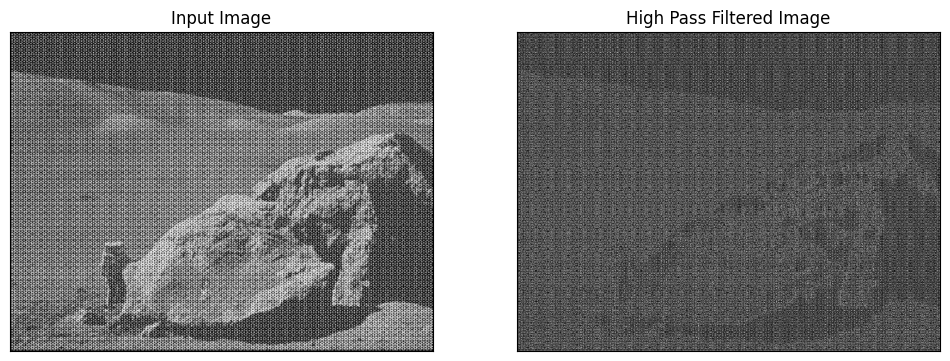

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back_high_pass, cmap='gray')
plt.title('High Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

2. Реализуйте удаление периодического шума

In [29]:
magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

In [30]:
min_distance = 10
threshold_abs = 270
noise_coords = peak_local_max(magnitude_spectrum, min_distance=min_distance, threshold_abs=threshold_abs)
print(len(noise_coords))

37


In [31]:
radius = 81
mask_noise = np.ones_like(dft_shift)
cv.circle(mask_noise, (ccol, crow), radius + 12, (0, 0), -1)  
cv.circle(mask_noise, (ccol, crow), radius - 12, (1, 1), -1) 

array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        ...,
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        ...,
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        ...,
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       ...,

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        ...,
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        ...,
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        ...,
        [1., 1.],
        [1., 1.],
        [1., 1.]]], shape=(594, 787, 2), dtype=float32)

In [32]:
dft_shift_noise_removed = dft_shift * mask_noise
f_ishift_noise_removed = np.fft.ifftshift(dft_shift_noise_removed)
img_back_noise_removed = cv.idft(f_ishift_noise_removed)
img_back_noise_removed = cv.magnitude(img_back_noise_removed[:, :, 0], img_back_noise_removed[:, :, 1])

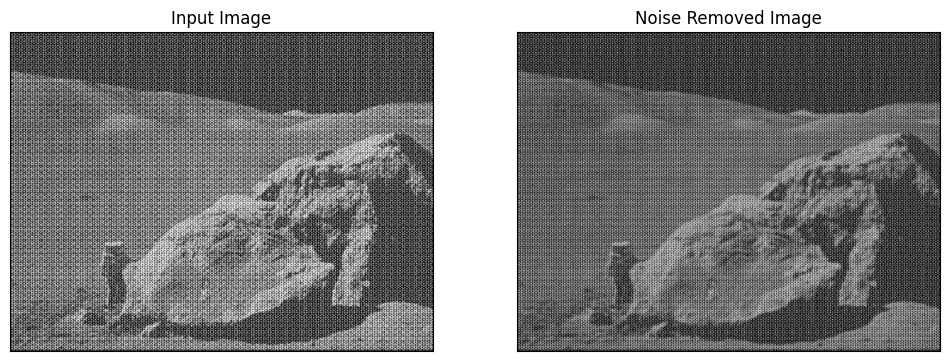

In [33]:
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back_noise_removed, cmap='gray')
plt.title('Noise Removed Image'), plt.xticks([]), plt.yticks([])
plt.show()